In [1]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact,pdp_interact_plot
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
from joblib import dump
from joblib import load
%config IPCompleter.greedy=True
# size for web display
plt.rcParams['figure.dpi'] = 72

In [2]:
df1 = pd.read_csv('vehicles_trimmed1.csv')
df1

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,drive,size,type,paint_color,image_url,county,state,lat,long
0,0,7034441763,salt lake city,17899.0,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,...,manual,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,NaN,ut,40.7372,-111.858
1,1,7034440610,salt lake city,NaN,2016.0,ford,f-150,excellent,NaN,gas,...,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,NaN,ut,40.5881,-111.884
2,2,7034440588,salt lake city,46463.0,2015.0,gmc,sierra 1500,excellent,NaN,gas,...,automatic,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,NaN,ut,40.5881,-111.884
3,3,7034440546,salt lake city,NaN,2016.0,ford,f-150,excellent,NaN,gas,...,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,NaN,ut,40.5881,-111.884
4,4,7034406932,salt lake city,49999.0,2018.0,ford,f-450,NaN,NaN,diesel,...,automatic,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,509572,7034554007,salt lake city,15476.0,2012.0,nissan,xterra,NaN,6 cylinders,gas,...,automatic,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,NaN,ut,39.6405,-104.961
509573,509573,7034538385,salt lake city,9881.0,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,...,automatic,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,NaN,ut,39.6405,-104.961
509574,509574,7034523643,salt lake city,24895.0,2019.0,jeep,cherokee,NaN,4 cylinders,gas,...,automatic,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,NaN,ut,45.1637,-113.894
509575,509575,7034458858,salt lake city,32500.0,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,...,automatic,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,NaN,ut,41.3112,-111.969


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [3]:
df1.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'image_url',
       'county', 'state', 'lat', 'long'],
      dtype='object')

In [4]:
# Choose target
target = 'price'

In [5]:
# Is your problem regression or classification?
# Regression, predicting a continuous variable with many levels

Text(0.5, 1.0, 'Price Distribution')

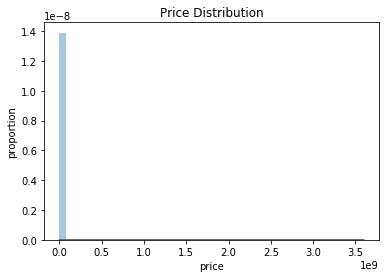

In [10]:
# Target distribution
fig, ax = plt.subplots()
sns.distplot(df1['price'])
ax.set_ylabel('proportion')
ax.set_title('Price Distribution')

In [7]:
pd.options.display.float_format = '{:.1f}'.format

In [8]:
print(np.median(df1['price']))
y = df1['price']
y.describe()
# Very right skewed but the 0s are holding it back even more. 
# Let's look at logs

nan


count       465998.0
mean         59921.3
std       10012722.5
min              1.0
25%           5000.0
50%          10500.0
75%          18950.0
max     3600028900.0
Name: price, dtype: float64

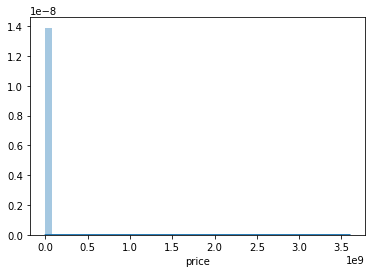

In [9]:
y = y.replace(0, np.NaN)
sns.distplot(y)

In [10]:
# It was deemed not worth log transforming, I did some modeling below and R^2 was worse
# y_log = np.log1p(y)
# sns.distplot(y_log)

In [8]:
# Chop out some outliers

df2 = df1
df2['price'] = df2['price'].replace(0,np.NaN)
df2 = df2.dropna(subset=['price'])
df2 = df2[(df2['price'] >= np.percentile(df2['price'], 0.05)) &
          (df2['price'] <= np.percentile(df2['price'], 99.95))]
df2['price'].describe()

count    465765.000000
mean      13606.176892
std       11430.780580
min           1.000000
25%        5000.000000
50%       10500.000000
75%       18949.000000
max      149000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Distribution')

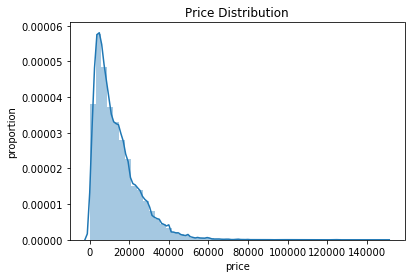

In [11]:
fig, ax = plt.subplots()
sns.distplot(df2['price'])
ax.set_ylabel('proportion')
ax.set_title('Price Distribution')

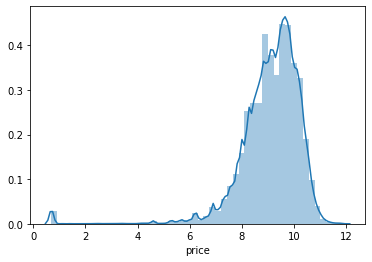

In [13]:
y = np.log1p(df2['price'])
sns.distplot(y)
# Now it's left skewed. Perhaps not worth log transform

In [14]:
y.describe()

count   465765.0
mean         9.1
std          1.2
min          0.7
25%          8.5
50%          9.3
75%          9.8
max         11.9
Name: price, dtype: float64

In [15]:
# Dollar amount of the average
np.e**9.1

8955.292703482504

In [16]:
# Choose your evaluation metric(s).

# R^2, MAE

In [17]:
#Choose which observations you will use to train, validate, and test your model.
train_orig, test = train_test_split(df2.drop(columns=['county','Unnamed: 0']) , test_size = 0.1, train_size = 0.9)
test

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
107134,7049701632,reno / tahoe,1600.0,1994.0,gmc,1500 suburban,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00808_eHXxfqYpB6...,ca,39.5,-119.8
333667,7044481835,greensboro,5700.0,2010.0,volvo,s40,excellent,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,silver,https://images.craigslist.org/01010_kUnl1Jzwpo...,nc,36.1,-80.1
125491,7038496019,stockton,15999.0,2017.0,hyundai,santa fe sport,excellent,NaN,gas,36000.0,clean,automatic,fwd,NaN,SUV,NaN,https://images.craigslist.org/01111_2In9QFyEPe...,ca,38.6,-121.4
82776,7049804571,fresno / madera,14999.0,2017.0,toyota,camry,NaN,NaN,gas,88973.0,clean,automatic,fwd,NaN,sedan,silver,https://images.craigslist.org/00h0h_44B0DR7MCa...,ca,36.8,-119.8
351915,7044053261,central NJ,14990.0,2010.0,ford,econoline,good,8 cylinders,gas,53366.0,clean,automatic,rwd,full-size,truck,white,https://images.craigslist.org/00w0w_leXh6Ll1VY...,nj,40.5,-74.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189852,7032585096,treasure coast,6699.0,2010.0,toyota,prius,excellent,4 cylinders,hybrid,154000.0,clean,automatic,fwd,full-size,hatchback,black,https://images.craigslist.org/00101_3sb8qRCXPi...,fl,26.8,-80.1
379132,7047833194,new york city,11227.0,2017.0,hyundai,accent se sedan auto,NaN,4 cylinders,gas,41479.0,clean,automatic,fwd,NaN,sedan,silver,https://images.craigslist.org/01212_2dMaAbWMw0...,ny,41.0,-73.8
396704,7049297544,cleveland,499.0,2014.0,chrysler,300,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00H0H_3Dx8FhuwTf...,oh,41.1,-82.1
437582,7039581301,harrisburg,199.0,2017.0,dodge,charger,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00i0i_ChcqziILO2...,pa,40.3,-76.9


In [18]:
train, val = train_test_split(train_orig, train_size = 0.9, test_size = 0.1)
train

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
226933,7045287656,kokomo,9950.0,2015.0,chevrolet,malibu lt,excellent,4 cylinders,gas,84000.0,clean,automatic,fwd,full-size,sedan,silver,https://images.craigslist.org/00t0t_WQpsoN5nPl...,in,40.4,-86.8
116001,7049238729,san luis obispo,1995.0,2001.0,subaru,forester,excellent,NaN,gas,314871.0,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00A0A_cSfHvYZ02p...,ca,35.1,-120.6
97282,7048392380,monterey bay,14995.0,2010.0,ford,mustang v6,excellent,6 cylinders,gas,36551.0,clean,manual,rwd,NaN,coupe,red,https://images.craigslist.org/00i0i_75GtSHzAU8...,ca,36.7,-121.8
477112,7049096146,tri-cities,18000.0,2016.0,toyota,camry xle sedan 4d,good,NaN,gas,33969.0,clean,automatic,fwd,NaN,sedan,black,https://images.craigslist.org/01515_aAy8RNRhV5...,tn,33.8,-84.4
429058,7050083177,portland,18999.0,2004.0,ford,excursion limited,NaN,8 cylinders,diesel,152669.0,clean,automatic,4wd,NaN,SUV,NaN,https://images.craigslist.org/01414_929Q2TQrOf...,or,45.4,-122.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273107,7037000665,western massachusetts,4265.0,2009.0,NaN,Scion tC,NaN,4 cylinders,gas,129737.0,clean,manual,NaN,NaN,coupe,NaN,https://images.craigslist.org/00707_bLpvN6gVzz...,ma,41.6,-73.1
475085,7048462289,nashville,20900.0,2015.0,chevrolet,silverado 2500,NaN,NaN,gas,158000.0,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00F0F_iT29FvCJ8E...,tn,35.3,-87.3
449413,7040904213,williamsport,6500.0,2007.0,bmw,x5,good,8 cylinders,gas,144000.0,lien,automatic,4wd,mid-size,SUV,blue,https://images.craigslist.org/01313_95BuvZqA0b...,pa,41.4,-76.9
458014,7040956997,florence,5200.0,1998.0,jeep,wrangler,good,4 cylinders,gas,200000.0,clean,manual,4wd,NaN,NaN,NaN,https://images.craigslist.org/00x0x_5PH2Lwd4Ph...,sc,34.0,-79.9


In [19]:
#  Begin to clean and explore your data.
# Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [20]:
# Wrangle ML datasets¶
# Continue to clean and explore your data.
#  For the evaluation metric you chose, what score would you get just by guessing?
#  Can you make a fast, first model that beats guessing?

In [21]:
# MEAN BASELINE
#  For the evaluation metric you chose, what score would you get just by guessing?
# R^2 for a flat line of the mean would be 0. Let's look at the MAE
list_of_mean = [train['price'].mean()] * len(val['price'])
mean_absolute_error(val['price'], list_of_mean)

8613.488640313122

In [22]:
# LINEAR REGRESSION (to beat) BASELINE
# Let's do a univariate linear regression as a baseline as well
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(train[['year']])
lr = LinearRegression()
model = lr.fit(imp_mean.transform(train[['year']]),train['price'])

print('MAE:', mean_absolute_error(val['price'], model.predict(imp_mean.transform(val[['year']]))))
print('R^2:', r2_score(val['price'], model.predict(imp_mean.transform(val[['year']]))))
# Alrighty then. Got some baselines!

MAE: 7829.128813210316
R^2: 0.09961097986046219


In [23]:
target = 'price'
features = ['region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat',
       'long']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [24]:
# Heck let's do a decision tree as a baseline too
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeRegressor(max_depth=10)
)
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region', 'manufacturer', 'model',
                                      'condition', 'cylinders', 'fuel',
                                      'title_status', 'transmission', 'drive',
                                      'size', 'type', 'paint_color', 'state'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': kokomo               1
san luis obispo...
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=10, max_f

In [25]:
y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# Pretty dope tree

MAE: 4046.073483860394
R^2: 0.662591542690196


In [26]:
# Permutation & Boosting¶
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x If you haven't completed assignment #1, please do so first.
# x Continue to clean and explore your data. Make exploratory visualizations.
# x Fit a model. Does it beat your baseline?
# x Try xgboost.
# x Get your model's permutation importances.

In [27]:
train.dtypes

id                int64
region           object
price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
image_url        object
state            object
lat             float64
long            float64
dtype: object

Text(0.5, 1.0, 'price by year')

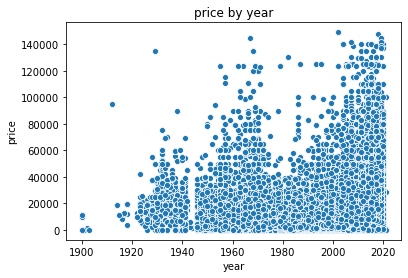

In [28]:
sns.scatterplot(train['year'], train['price'])
plt.title('price by year')

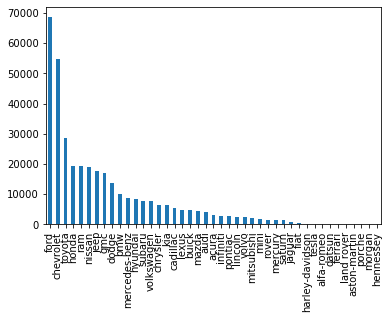

In [29]:
train['manufacturer'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'price by color')

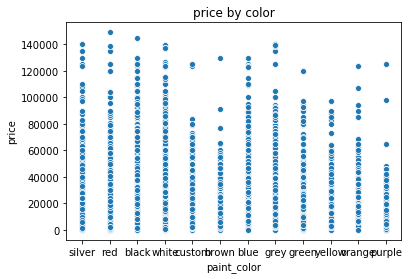

In [30]:
sns.scatterplot(train['paint_color'], train['price'])
plt.title('price by color')

In [31]:
# BEAT BASELINE WITH TREES
%time
# Random Forest model

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_estimators=50)
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# lit, already happy about that

Wall time: 0 ns
MAE: 2239.446412036939
R^2: 0.8332063700252051


In [32]:
# XGBoost

# pipeline = make_pipeline(
#     ce.OrdinalEncoder(), 
#     # SimpleImputer(strategy='median'),  missing values accepted in this
#     XGBRegressor(n_estimators=70, random_state=42, n_jobs=-1)
# )
# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_val)
# print('MAE:', mean_absolute_error(y_val, y_pred))
# print('R^2:', r2_score(y_val, y_pred))

# Much to tune

In [33]:
# Early stopping, 
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_val_encoded = encoder.transform(X_val)
# model = XGBRegressor(
#     n_estimators= 500, # up to 1000, depends on early stop
#     max_depth = 7,
#     learning_rate= 0.5, # try higher learning rate
# )

# eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

# model.fit(X_train_encoded,y_train,
#           eval_set = eval_set,
#           eval_metric = 'mae',
#           early_stopping_rounds = 50)
# Random forest still better, will have to play with it

In [34]:
# Early stopping, TUNED
%time
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(
    n_estimators= 100, # up to 100, depends on early stop
    max_depth = 35,
    learning_rate= 0.10, # Lower rate helps with overfitting.
    n_jobs=-3
)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(X_train_encoded,y_train,
          eval_set = eval_set, # This is what is being scored (why we have two col)
          eval_metric = 'mae',
          early_stopping_rounds = 2) #stop if score not improved in n rounds
    

Wall time: 0 ns
[19:09:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:12306.1	validation_1-mae:12357.5
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 2 rounds.
[1]	validation_0-mae:11128.7	validation_1-mae:11205.1
[2]	validation_0-mae:10068.4	validation_1-mae:10176.8
[3]	validation_0-mae:9112.61	validation_1-mae:9254.38
[4]	validation_0-mae:8250.88	validation_1-mae:8430.43
[5]	validation_0-mae:7473.2	validation_1-mae:7693.9
[6]	validation_0-mae:6773.07	validation_1-mae:7041.15
[7]	validation_0-mae:6141.27	validation_1-mae:6462.49
[8]	validation_0-mae:5571.55	validation_1-mae:5948.34
[9]	validation_0-mae:5058.13	validation_1-mae:5494.59
[10]	validation_0-mae:4593.83	validation_1-mae:5091.11
[11]	validation_0-mae:4174.82	validation_1-mae:4735.66
[12]	validation_0-mae:3795.87	validation_1-mae:4421.23
[13]	vali

[144]	validation_0-mae:23.0775	validation_1-mae:2052.51
[145]	validation_0-mae:23.0534	validation_1-mae:2052.51
[146]	validation_0-mae:23.0257	validation_1-mae:2052.5
[147]	validation_0-mae:23.0022	validation_1-mae:2052.5
[148]	validation_0-mae:22.9817	validation_1-mae:2052.49
[149]	validation_0-mae:22.9536	validation_1-mae:2052.49
[150]	validation_0-mae:22.9291	validation_1-mae:2052.48
[151]	validation_0-mae:22.9051	validation_1-mae:2052.48
[152]	validation_0-mae:22.8822	validation_1-mae:2052.47
[153]	validation_0-mae:22.859	validation_1-mae:2052.47
[154]	validation_0-mae:22.8389	validation_1-mae:2052.47
[155]	validation_0-mae:22.8211	validation_1-mae:2052.46
[156]	validation_0-mae:22.8041	validation_1-mae:2052.46
[157]	validation_0-mae:22.7872	validation_1-mae:2052.46
[158]	validation_0-mae:22.7741	validation_1-mae:2052.45
[159]	validation_0-mae:22.7589	validation_1-mae:2052.45
[160]	validation_0-mae:22.7424	validation_1-mae:2052.45
[161]	validation_0-mae:22.7269	validation_1-mae:205

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Text(0.5, 1.0, 'XGBoost MAE by Round')

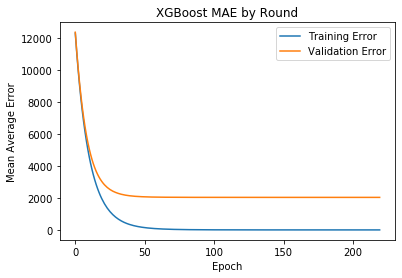

In [35]:
# Let's plot XGBoost's journey

results = model.evals_result_
training_err = results['validation_0']['mae']
validation_err = results['validation_1']['mae']
epoch = list(range(0,len(training_err)))

plt.plot(epoch,training_err, label = 'Training Error')
plt.plot(epoch,validation_err, label = 'Validation Error')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean Average Error')
plt.title('XGBoost MAE by Round')

In [36]:
# Can we just take the output model and use that??
%time
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(X_train_encoded, y_train)

Wall time: 0 ns
[19:15:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
# XGBoost R^2
y_pred = model.predict(X_val_encoded)
print('R^2:', r2_score(y_val, y_pred))

# BEAT BASELINE, slightly better than RF R^2= 0.8407

R^2: 0.8320651788702829


In [38]:
# Clean up for permutation importances/ pdp

imputer = SimpleImputer(strategy='median')
X_val_imputed = imputer.fit_transform(X_val_encoded)
#df_val_imputed = pd.DataFrame(data= val_imputed, columns=val.columns)
# X_val_imputed = df_val_imputed[features]


xgb = model.fit(X_val_imputed, y_val)

[19:24:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
# Permutation importances
permuter = PermutationImportance(
    model,
    scoring= 'r2',
    n_iter = 5,
    random_state=42

)

permuter.fit(X_val_imputed, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=35,
                                             min_child_weight=1, missing=None,
                                             n_estimators=350, n_jobs=-3,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                     

In [40]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

# Here I can consider cutting down columns, would it make a better app?
# predictively I'm ok, not great, so should I prioritize ^

year           0.8
odometer       0.4
fuel           0.3
drive          0.3
cylinders      0.2
manufacturer   0.1
model          0.1
long           0.1
lat            0.1
type           0.1
region         0.0
condition      0.0
state          0.0
paint_color    0.0
transmission   0.0
size           0.0
title_status   0.0
dtype: float64

In [41]:
eli5.show_weights(
    permuter,
    top=11, # number of features to show, no limit
    feature_names= feature_names, # must be a list
)

Weight,Feature
0.7557 ± 0.0140,year
0.4272 ± 0.0057,odometer
0.2684 ± 0.0077,fuel
0.2529 ± 0.0132,drive
0.1551 ± 0.0057,cylinders
0.1195 ± 0.0033,manufacturer
0.0831 ± 0.0013,model
0.0775 ± 0.0029,long
0.0626 ± 0.0031,lat
0.0582 ± 0.0017,type


In [42]:
# Model Interpretation
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
# x Make at least 1 partial dependence plot to explain your model.
# x Make at least 1 Shapley force plot to explain an individual prediction.
# x Share at least 1 visualization (of any type) on Slack!
# Stretch Goals
# Partial Dependence Plots
#  Make multiple PDPs with 1 feature in isolation.
# x Make multiple PDPs with 2 features in interaction.
#  Use Plotly to make a 3D PDP.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b909081d48>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b916011908>})

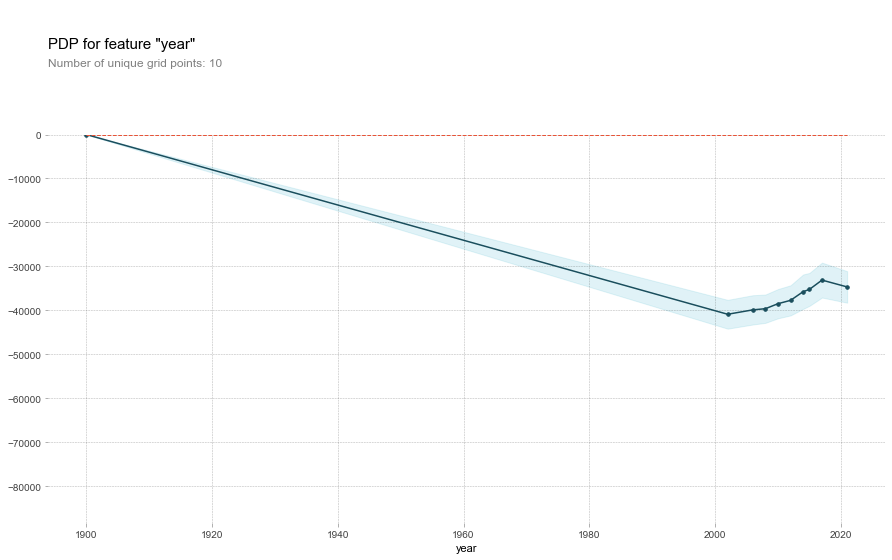

In [43]:
# x Make at least 1 partial dependence plot to explain your model.

val_imp_df = pd.DataFrame(X_val_imputed, columns = X_val.columns)
feature = 'year'

isolated = pdp_isolate(
    model = pipeline,
    dataset= val_imp_df,
    model_features= X_val.columns,
    feature = feature
)
pdp_plot(isolated, feature_name= feature)

# neat. You can kinda see what cars people put up for sale have value.

In [44]:
# let's look at that old year
val.sort_values(by='year').head(4)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
135695,7049705658,denver,15800.0,1900.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,126000.0,clean,automatic,4wd,NaN,NaN,orange,https://images.craigslist.org/00B0B_lGWjhvAa99...,co,39.7,-105.1
66728,7044063060,prescott,4000.0,1920.0,ford,NaN,good,4 cylinders,gas,9999.0,clean,automatic,rwd,full-size,truck,custom,https://images.craigslist.org/00G0G_iTtRoRTKYe...,az,34.3,-112.6
385092,7045483600,utica-rome-oneida,650.0,1920.0,ford,model t,NaN,NaN,gas,nan,clean,other,NaN,NaN,NaN,NaN,https://images.craigslist.org/01616_OtG9oD0XK2...,ny,42.9,-75.2
184011,7048818593,tallahassee,42950.0,1923.0,ram,2500,new,6 cylinders,diesel,600.0,clean,automatic,4wd,full-size,truck,white,https://images.craigslist.org/00w0w_9pQYYF4oV1...,fl,30.6,-84.2


(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b9091ae7c8>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b90919da08>})

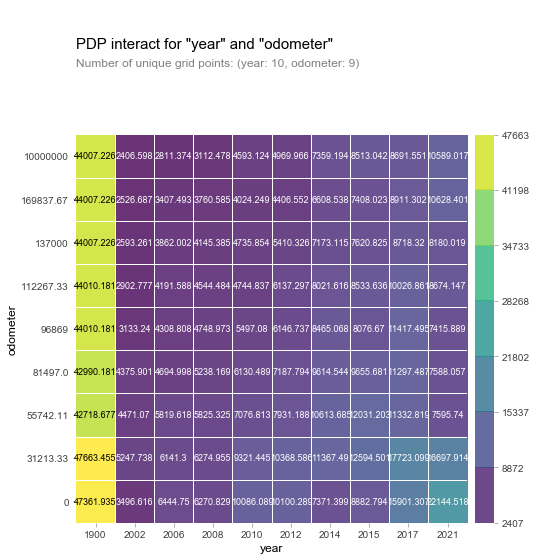

In [45]:
# STRETCH
#  Make multiple PDPs with 2 features in interaction.

feature= ['year', 'odometer']

interaction = pdp_interact(
    model = pipeline,
    dataset = val_imp_df,
    model_features= X_val.columns,
    features= feature
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)
# Kinda meaningless without the drive dictionary

In [46]:
# encoder.get_feature_names 
# Didn't quite get this to work to show drive

In [59]:
#  Make at least 1 Shapley force plot to explain an individual prediction.

row = X_val_encoded.iloc[5]
y_val.iloc[[5]], model.predict(row)

(338622   8900.0
 Name: price, dtype: float64,
 array([8899.996], dtype=float32))

In [60]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value,
    shap_values = shap_values,
    features= row

)


In [61]:
## Final model for app usage

target = 'price'
features1 = ['year', 'manufacturer', 'cylinders','fuel', 'odometer', 'drive']
X_train1 = train[features1]
y_train = train[target]
X_val1 = val[features1]
y_val = val[target]
X_test1 = test[features1]
y_test = test[target]

In [ ]:
# pipeline1 = make_pipeline(
#     ce.TargetEncoder(),
#     SimpleImputer(strategy='median'),
#     RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
#                                        criterion='mae', max_depth=18,
#                                        max_features='auto', max_leaf_nodes=None,
#                                        max_samples=None,
#                                        min_impurity_decrease=0.0,
#                                        min_impurity_split=None,
#                                        min_samples_leaf=1, min_samples_split=2,
#                                        min_weight_fraction_leaf=0.0,
#                                        n_estimators=35, n_jobs=None,
#                                        oob_score=False, random_state=42,
#                                        verbose=0, warm_start=False)
# )
# pipeline1.fit(X_train1, y_train)

# y_pred = pipeline1.predict(X_val1)
# print('MAE:', mean_absolute_error(y_val, y_pred))
# print('R^2:', r2_score(y_val, y_pred))



In [ ]:
# pickle the chosen model
# dump(pipeline1, 'pipeline_drive.joblib', compress=True)